In [2]:
import torch
import torch.nn as nn    # This submodule contains the building blocks for creating neural networks in PyTorch
import torch.nn.functional as F    # To access various functional interfaces

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

MNIST Image --> Tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100.0%


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



100.0%


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100.0%


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



100.0%


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [7]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [9]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

train_data[0] is a tuple
which contains an image and a label, let's use tuple unpacking

In [10]:
image, label = train_data[0]

In [11]:
print('image shape: ',image.shape)
print('label: ',label)

image shape:  torch.Size([1, 28, 28])
label:  5


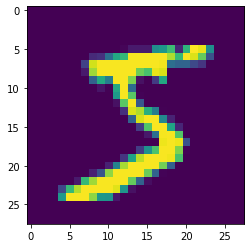

In [12]:
# We have a little slight problem here, we should reshape the image from ([1, 28, 28]) to (28, 28)
plt.imshow(image.reshape(28,28))

Matplotlib has a defult color mapping<br>So this defult color mapping is a color mapping called **Virdis**<br>This does not imply that the actual image itself

In [15]:
# Sets the seed for generating random numbers. Returns a torch.Generator object.
torch.manual_seed(102)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

We have loaded that dataset into the **DataLoader** and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled

- You can make a larger batch size for your test_loader since you are essentially going to pass in bunch of images and classify them
- Consistent Evaluation: During testing, you want the evaluation to be consistent. If you shuffle the test data for each evaluation iteration, you might get different results each time you evaluate the model, even if the model has not changed. By keeping shuffle=False, you ensure that the test data is evaluated in the same order every time, providing consistent and comparable results.

In [21]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [22]:
for images, labels in train_loader:
    break

In summary, this code below takes a list of images, arranges them into a grid, creates a figure with a specified size, and then displays the image grid using Matplotlib. The np.transpose operation is necessary to ensure that the image data is in the correct format for visualization.

Labels:  [   8    6    6    3    2    0    9    2    5    0    5    1]


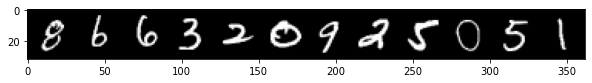

In [24]:
print('Labels: ', labels[:12].numpy())
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))